<a href="https://colab.research.google.com/github/Nakulpradeep94/EDA_CHURN_ANALYSIS/blob/main/Nakul_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>



## <b>What is Churn Prediction? </b> 

### Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the customer gives up the product or service.

#**IMPORTING LIBRARIES**


In [ ]:
import numpy as np                                            
import pandas as pd 
import matplotlib.pyplot as plt  
%matplotlib inline                                            
import seaborn as sns  

##**MOUNT THE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Importing dataset**

In [ ]:
file_path='/content/drive/MyDrive/Colab Notebooks/ALMABETTER/Capstone-EDA/Copy of Telecom Churn.csv'
df=pd.read_csv(file_path)

#Analysing data

In [ ]:
# To go through the first 5 indexes of the dataset
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# To go through the last 5 indexes of the dataset
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
# to find the number of rows and columns in the given dataset
df.shape

(3333, 20)

In [ ]:
# to find data types of columns from the given data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

we can see that 3333 non-null values for all columns where the row value is 3333 we can deduce here that there are no null  values.however a proper and direct method is using isnull method which will be done a few steps later 

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# descriptive summary of all columns 
df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [ ]:
# To transpose data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [ ]:
#to know the columns
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
# now checking for duplicate columns 
df[df.duplicated()].shape

(0, 20)

as we see there are no duplicate data rows in our sample , so we can move ahead.

In [ ]:
#to find the no of unique values in the column
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

there are 51 unique values in the states column implying the 50 states of usa and washington d.c. This is found out by searching few area codes and we can get in to the conclusion.eg. 415- Sanfrancisco,510-East Bay cities in Northern California

In [ ]:
#to find list of distinct area codes
list(df['Area code'].unique())

[415, 408, 510]

We can conclude the below details about the data from the primary checks performed above




Below is a description of the columns/variables in Telecom churn analysis data


*   State- 50  states in usa and washingthon d.c(This inference was found out by using area code given in column and thus making inference)
*   Account length- it is the no of days the account has been active
*   Area code- there are only 3 area codes and they are 415- Sanfrancisco, 510-East Bay cities in Northern California, 408-San Jose, CA and the surrounding areas
*   International plan - Yes and No are the values present and Yes implies international Plan is present ,No implies international plan is not present

*   Voice mail plan-Yes Indicates Voice Mail Plan is Present and No Indicates no  Voice Mail Plan
*   Number vmail messages - number of voice mail messages(min value=0 and max value=51)

*   Total day minutes- total minutes of call in day
*   Total day calls- total number of calls in day

*   Total day charge-Total charges to customer in morning
*   Total eve minutes- Total minutes of call in evening

*   Total eve calls- total number of calls made by customer in the evening 
*   Total eve charge-Total charges to customer in evening

*   Total night minutes-Total number of minutes spent by customers in the night
*  Total night calls- Total number of calls made by Customer in night

*   Total night charge- Total charges incurred to customer during night time.
*   Total intl minutes -Total minutes of international calls.

*   Total intl calls- Total number of international calls by customer
*   Total intl charge-Total charges incurred due to international calls

*   Customer service calls - Total number of customer service calls
*   Churn-it has boolean object type with values False implying customer continuing services with the provider True implying customer stopped the services 








---

















# Checking and Handling  of null values

In [ ]:
#conventional approach to check for null values
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
#Checking if there are any null values in the dataframe
df.isnull().values.any()

False

False implying there are no null values present

we can clearly see that there are no null values.
however if there was any null values.we can drop particular column if it is not relevant to database or we could use dropna() or fillna() function accordingly

---



In [ ]:
#to find correlation 
df.corr()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


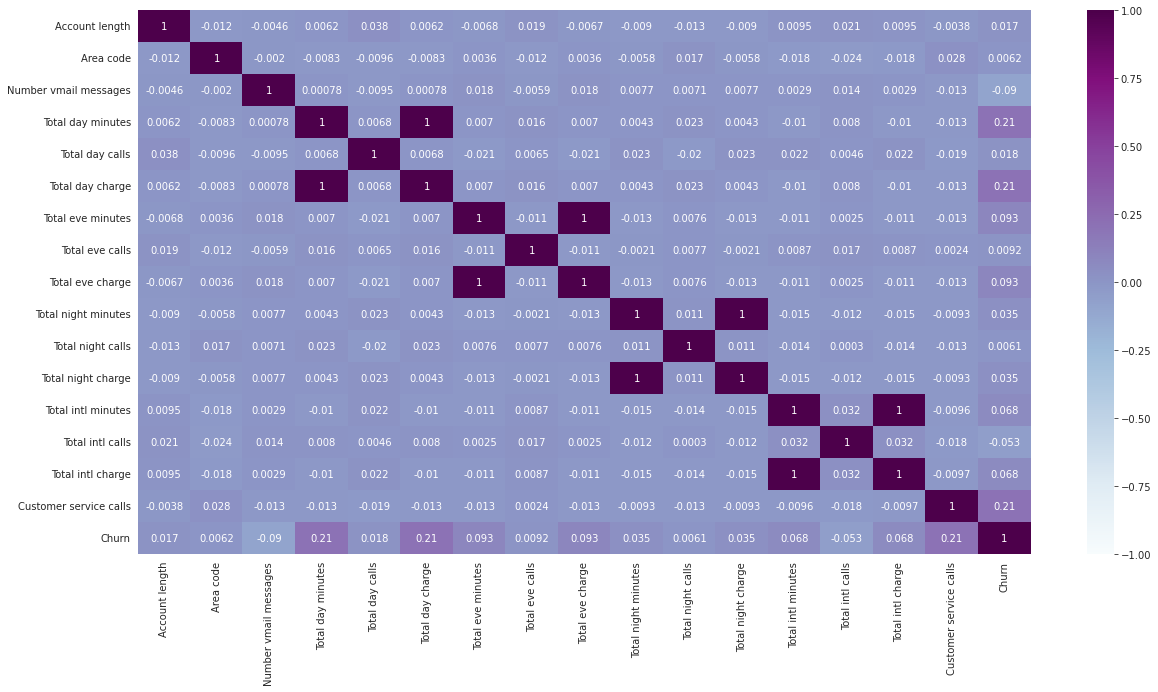

In [ ]:
#to find correlation heatmap to get a better visual output
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), vmin=-1, cmap='BuPu', annot=True)

It's quite evident from the graph and figure that there exists a perfect linear relationship between between Minutes and its corresponding Charge.(ie for international charge with international minutes,for day charges with day minutes,evening charges with evening minutes and finally night charges with night minutes).The call minutes are highly correlated with call charges.So consider only call minutes for further analysis.

#DATA VISUALIZATION

In [ ]:
#to find churn percentage
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Churn Percentage')

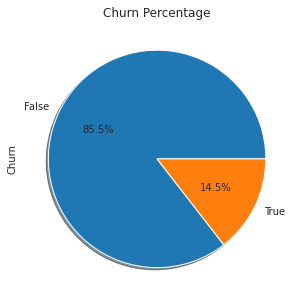

In [ ]:
df['Churn'].value_counts().plot(kind='pie',figsize=(10, 5),autopct='%1.1f%%',shadow=True)
plt.title("Churn Percentage")

we can see that the customer churning rate is  low ie 14.5%. So better strategies are needed to further reduce it

In [ ]:
#to find which state has best churn rate
df_total=df.groupby('State').agg({'Churn':'count'}).rename(columns={'Churn':'Total'})


In [ ]:
df_true=df[df["Churn"] == bool(True)].groupby('State').agg({'State':'count'}).rename(columns={'State':'True_sum'})

In [ ]:
df_false=df[df["Churn"] == bool(False)].groupby('State').agg({'State':'count'}).rename(columns={'State':'False_sum'})

In [ ]:
state_churn_df=pd.concat([df_total,df_true,df_false],axis=1)
state_churn_df.head()

,Total,True_sum,False_sum
State,,,
AK,52,3,49
AL,80,8,72
AR,55,11,44
AZ,64,4,60
CA,34,9,25


In [ ]:
#finding churn percentage by state
state_churn_df['churnpercent']=state_churn_df['True_sum']*100/state_churn_df['Total']
state_churn_df=state_churn_df.sort_values('churnpercent',ascending=False)
state_churn_df.head()
state_churn_df.tail()

,Total,True_sum,False_sum,churnpercent
State,,,,
IA,44,3,41,6.818182
VA,77,5,72,6.493506
AZ,64,4,60,6.250000
AK,52,3,49,5.769231
HI,53,3,50,5.660377


In [ ]:
state_churn_df.head()

,Total,True_sum,False_sum,churnpercent
State,,,,
NJ,68,18,50,26.470588
CA,34,9,25,26.470588
TX,72,18,54,25.000000
MD,70,17,53,24.285714
SC,60,14,46,23.333333


Text(0, 0.5, 'Percentage Churn')

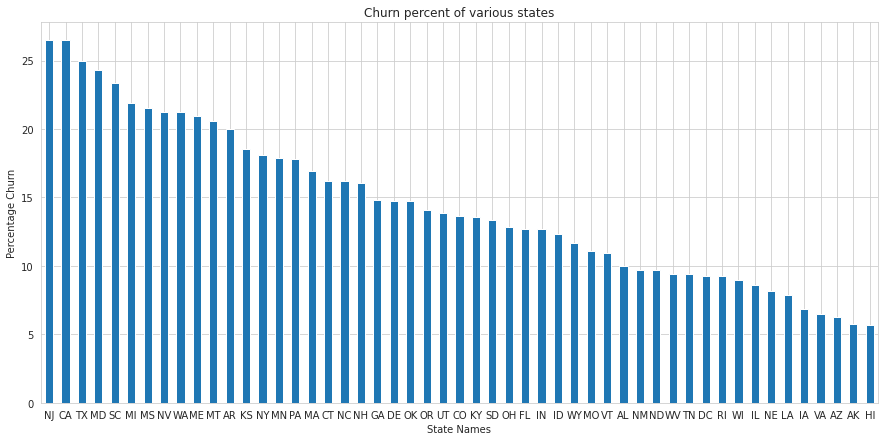

In [ ]:
# Representing the churn percentage as a graph
plt.figure(figsize=(15,7))
state_churn_df['churnpercent'].plot(kind="bar", title="Churn percent of various states")
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Churn percent of various states")
plt.xlabel("State Names")
plt.ylabel("Percentage Churn")

We can conclude that NJ,CA,TX,MD,SC has higher churn rate than the other states so the company should focus there more and provide better facilities to reduce the churn rate.Also HI,AK,AZ,VA,IA has very low churn rate.Company  can find what they are doing right in these states and try to implement it in states where there are high churn rate.

In [ ]:
#Account length
acc_nonchurn=df['Account length'].loc[df['Churn']==0].tolist()
acc_churn=df['Account length'].loc[df['Churn']==1].tolist()

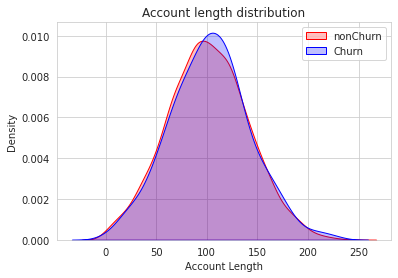

In [ ]:
p2=sns.kdeplot(acc_nonchurn, shade=True, color="r",label='nonChurn')
p2=sns.kdeplot(acc_churn, shade=True, color="b",label='Churn')
p2.set(xlabel ="Account Length", title ='Account length distribution')

plt.legend()

The distribution is more or less same for account length of churned and Non churned customers.ie Account length has no effect on the churn rate of customers.

In [ ]:
#area code
area_churn_df=pd.crosstab(index=df['Area code'],columns=df['Churn'],normalize="index")
area_churn_df

Churn,False,True
Area code,,
408,0.854415,0.145585
415,0.857402,0.142598
510,0.851190,0.148810


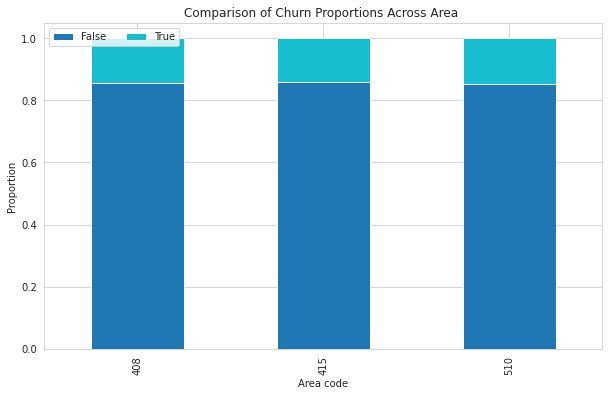

In [ ]:
area_churn_df.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Area code")
plt.ylabel("Proportion")
plt.title("Comparison of Churn Proportions Across Area ")
plt.show()

From the stacked barchart it is clear that there is no clear difference in churn rate across different area code

In [ ]:
# International plan
intpln_churn_df=pd.crosstab(index=df['International plan'],columns=df['Churn'],normalize="index")
intpln_churn_df

Churn,False,True
International plan,,
No,0.885050,0.114950
Yes,0.575851,0.424149


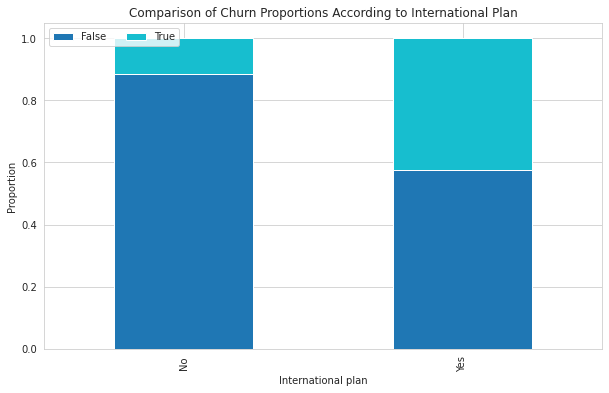

In [ ]:
intpln_churn_df.plot(kind='bar',stacked=True,colormap='tab10',figsize=(10, 6))
plt.legend(loc="upper left", ncol=2)
plt.xlabel("International plan")
plt.ylabel("Proportion")
plt.title("Comparison of Churn Proportions According to International Plan")
plt.show()

Most customers who have international plan are churned.
It could be because many of the plan might have been taken by tourists who churned once their tour is over.

In [ ]:
#Voice mail plan
vmpln_churn_df=pd.crosstab(index=df['Voice mail plan'],columns=df['Churn'],normalize="index")
vmpln_churn_df

Churn,False,True
Voice mail plan,,
No,0.832849,0.167151
Yes,0.913232,0.086768


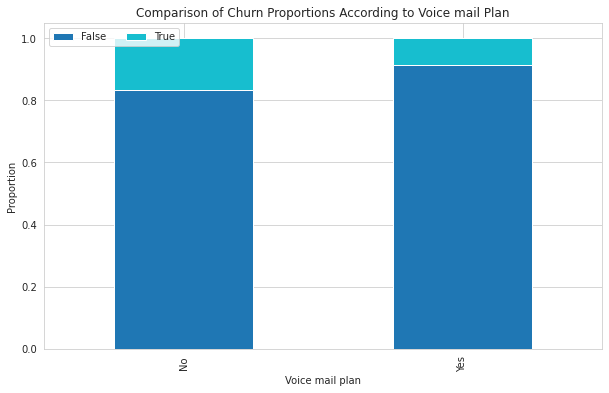

In [ ]:
vmpln_churn_df.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Voice mail plan")
plt.ylabel("Proportion")
plt.title("Comparison of Churn Proportions According to Voice mail Plan")
plt.show()

It shows that customers who dont have a voice mail plan are more churned

Text(0.5, 1.0, 'Comparison of distribution on Number of voicemail messages')

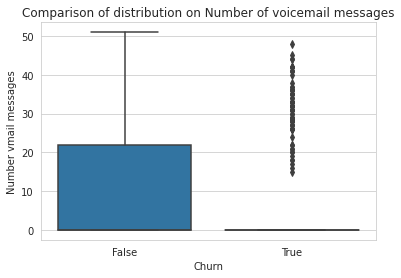

In [ ]:
#no of vmail messages and churn rate through box plate
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Churn', y = 'Number vmail messages', data =df).set_title('Comparison of distribution on Number of voicemail messages')


The customers who retained service most of them  did about 0-20 voicemail messages after that the distribution of retained customers is less indicating some underlying issue.So setting a limit of 20 voice calls might help reduce churn rate

Text(0.5, 1.0, 'Comparison of distribution of Churn values across total day minutes')

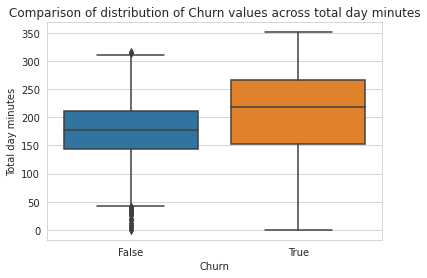

In [ ]:
# Total day minutes of Call
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Churn', y = 'Total day minutes', data =df).set_title('Comparison of distribution of Churn values across total day minutes')

We can infer from above box-plot that with users spending more 220 minutes or more i.e. approx 4hrs tend to switch to other operator.ie when day minutes are more then more people are leaving .Since the minutes are highly correlated to charges implying when charges are  high people are leaving. 

Text(0.5, 1.0, 'Comparison of distribution of Churn values across total day calls')

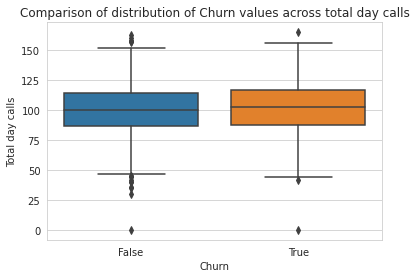

In [ ]:
sns.boxplot(x = 'Churn', y = 'Total day calls', data =df).set_title('Comparison of distribution of Churn values across total day calls')


We can infer here that on an average a 100 calls are made which is a good indication for the company.But we can also note that for the churn customer the median is slightly higher than 100 which indicates there are call drops as there are more calls in the morning.

Text(0.5, 1.0, 'Comparison of distribution of Churn values across total evening minutes')

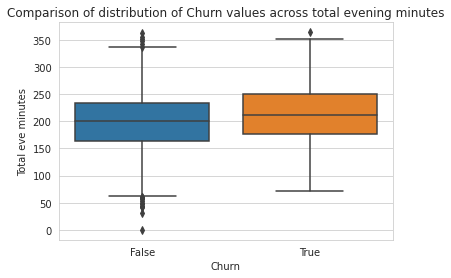

In [ ]:
#Total evening minutes of Call
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Churn', y = 'Total eve minutes', data =df).set_title('Comparison of distribution of Churn values across total evening minutes')

We can infer from the box plot that the  evening minutes across churned population is more than that of the non churned population.

Text(0.5, 1.0, 'Comparison of distribution of Churn values across total evening calls')

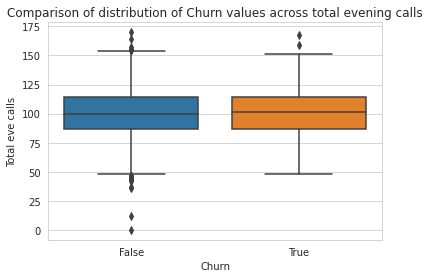

In [ ]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Churn', y = 'Total eve calls', data =df).set_title('Comparison of distribution of Churn values across total evening calls')

The total evening call distribution is roughly same 

Text(0.5, 1.0, 'Comparison of distribution of Churn values across total night minutes')

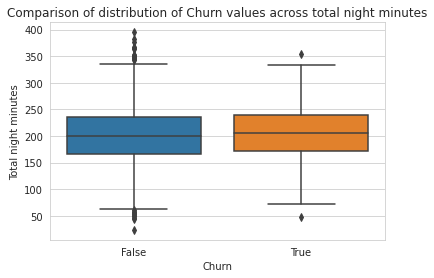

In [ ]:
# Total night minutes of call
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Churn', y = 'Total night minutes', data =df).set_title('Comparison of distribution of Churn values across total night minutes')

We can infer from the box plot that the night minutes across churned population is more than that of the non churned population.

Text(0.5, 1.0, 'Comparison of distribution of Churn values across total night minutes')

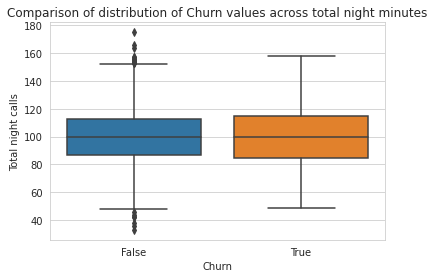

In [ ]:
sns.boxplot(x = 'Churn', y = 'Total night calls', data =df).set_title('Comparison of distribution of Churn values across total night minutes')

The total night call distribution is roughly same

Text(0.5, 1.0, 'Comparison of distribution of Churn values across total intl minutes')

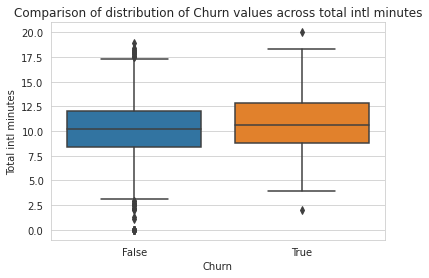

In [ ]:
#Total international minutes of call 
sns.boxplot(x = 'Churn', y = 'Total intl minutes', data =df).set_title('Comparison of distribution of Churn values across total intl minutes')


We can infer from the box plot that the international minutes across churned population is more than that of the non churned population.

Text(0.5, 1.0, 'Comparison of distribution of Churn values across total intl calls')

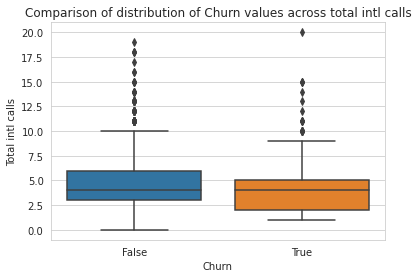

In [ ]:
# total international calls
sns.boxplot(x = 'Churn', y = 'Total intl calls', data =df).set_title('Comparison of distribution of Churn values across total intl calls')

the distribution of total international calls is negatively skewed. But the most ofvalues for churned is lower than the non churned 

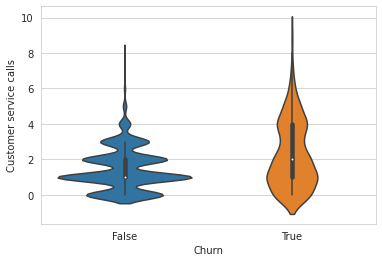

In [ ]:
#to get densities of retained and non retained customers
sns.set_style("whitegrid")
sns.violinplot(x = 'Churn', y = 'Customer service calls', data =df)


we can see from the violin plot that the  people who retained the service is when the customer service call is 2 for further increase in calls the people retained reduces. while in case of churned we can see that it increases to max at 2 calls then decreases and further increases when calls are 4.

In [ ]:
#to check effects of customer service calls
#Customer service calls
cscalls_churn_df=pd.crosstab(index=df['Customer service calls'],columns=df['Churn'],normalize="index")
cscalls_churn_df

Churn,False,True
Customer service calls,,
0,0.868006,0.131994
1,0.896698,0.103302
2,0.885375,0.114625
3,0.897436,0.102564
4,0.542169,0.457831
5,0.393939,0.606061
6,0.363636,0.636364
7,0.444444,0.555556
8,0.500000,0.500000


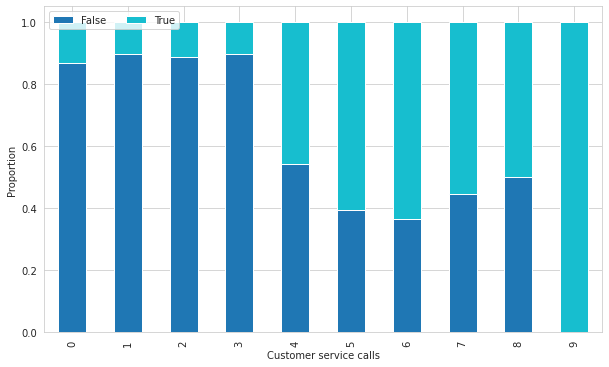

In [ ]:
cscalls_churn_df.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Customer service calls")
plt.ylabel("Proportion")
plt.show()

when customer service calls are 4 or higher there is a higher churn rate 